<a href="https://colab.research.google.com/github/HariTarz/Transport_Demand_Prediction/blob/main/Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

## Importing required libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

## Mounting the drive and reading the dataset file

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Supervised ML - Regression Capstone Project/Transport Demand Prediction/dat/train_revised.csv'
df = pd.read_csv(path)

## Exploring the dataset

In [38]:
# Viewing the data for the first time
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [40]:
df.shape

(51645, 10)

In [41]:
# Viewing the type 'object' columns description 
df.describe(include = 'object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [42]:
# Checking for null value containing row counts
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

Calculating the Target variable 'number_of_ticket'

In [43]:
# Calculation of Target varible based on the ride id
tmp_no_tickect_df = df.groupby(['ride_id']).seat_number.count().rename('number_of_ticket').reset_index()
tmp_no_tickect_df.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [44]:
# droping the duplicate value rows with the repeating ride_id
df = df.drop_duplicates('ride_id')

# Dropping the columns which are not relevant to our target variable
df.drop(['seat_number','payment_method','payment_receipt', 'travel_to'], inplace= True, axis = 1)
df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(6249, 6)

In [45]:
# Merging the calculated target variable column to the dataset based on the ride_id
df = df.merge(tmp_no_tickect_df, how= 'left', on='ride_id')

In [46]:
# Combaining the date column and time column to get the complete timestamp
df['travel_date_and_time'] = df['travel_date'] + " " + df['travel_time']
df['travel_date_and_time'] = pd.to_datetime(df['travel_date_and_time'])
df.drop(['travel_date', 'travel_time'], inplace= True, axis= 1)

In [47]:
df.head()

,ride_id,travel_from,car_type,max_capacity,number_of_ticket,travel_date_and_time
0,1442,Migori,Bus,49,1,2017-10-17 07:15:00
1,5437,Migori,Bus,49,1,2017-11-19 07:12:00
2,5710,Keroka,Bus,49,1,2017-11-26 07:05:00
3,5777,Homa Bay,Bus,49,5,2017-11-27 07:10:00
4,5778,Migori,Bus,49,31,2017-11-27 07:12:00


## EDA

Text(0.5, 1.0, 'car_type counts')

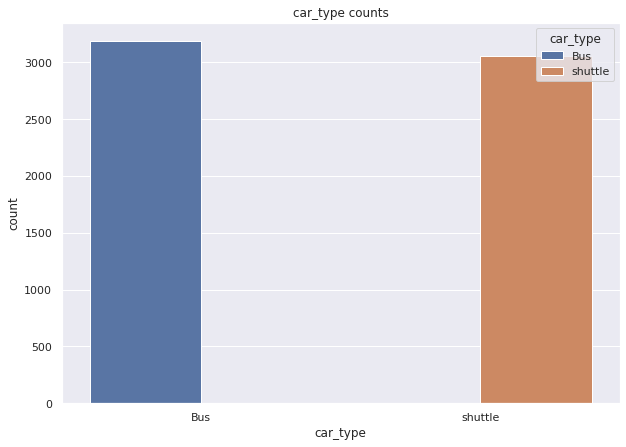

In [48]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='car_type', data=df, hue='car_type')
sns.set_theme(style='darkgrid')
ax.set_xlabel('car_type')
# ax.set_ylabel('Frequency')
ax.set_title('car_type counts')

Text(0.5, 1.0, 'max_capacity counts')

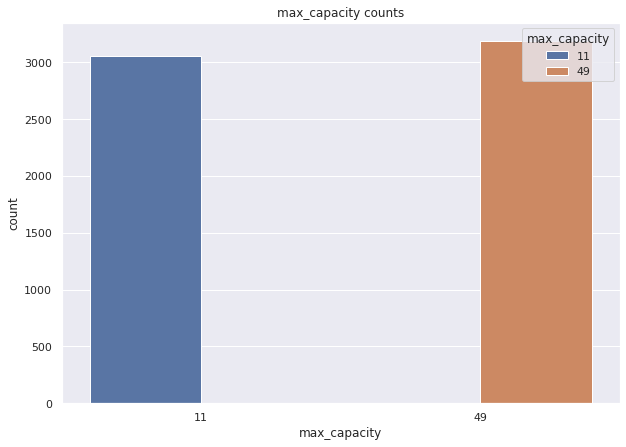

In [49]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='max_capacity', data=df, hue='max_capacity')
sns.set_theme(style='darkgrid')
ax.set_xlabel('max_capacity')
# ax.set_ylabel('Frequency')
ax.set_title('max_capacity counts')

Text(0.5, 1.0, 'travel_from counts')

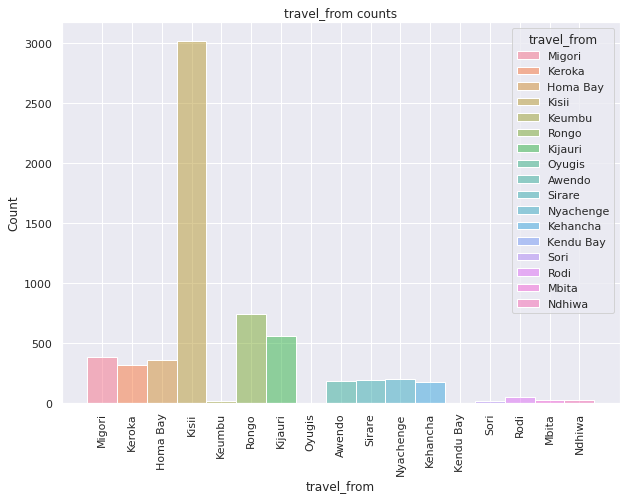

In [50]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.histplot(x='travel_from', data=df, hue='travel_from')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
# ax.set_xlabel('travel_from')
# ax.set_ylabel('Frequency')
ax.set_title('travel_from counts')

## Feature Engineering

In [51]:
trans_df = df.copy()

In [52]:
trans_df['travel_year']= trans_df['travel_date_and_time'].dt.year
trans_df['travel_month']= trans_df['travel_date_and_time'].dt.month
trans_df['travel_year_quarter']= trans_df['travel_date_and_time'].dt.quarter
trans_df['travel_day_of_year']= trans_df['travel_date_and_time'].dt.dayofyear
trans_df['travel_day_of_month']= trans_df['travel_date_and_time'].dt.day
trans_df['travel_day_of_week']= trans_df['travel_date_and_time'].dt.dayofweek
trans_df['travel_is_in_weekend']= trans_df['travel_day_of_week'].apply(lambda d: 1 if d in [5,6] else 0)
trans_df['travel_hour']= trans_df['travel_date_and_time'].dt.hour
# trans_df['travel_minute']= trans_df['travel_date_and_time'].dt.minute

In [53]:
def time_to_period(h):
  '''This function can take hours as input and return the time period of a day as output'''
  if h >= 7 and h < 11:
    return 'morning'
  elif h >= 11 and h < 15:
    return 'after_noon'
  elif h >= 15 and h < 19:
    return 'evening'
  elif h >= 19 and h <= 24:
    return 'night'
  else:
    return 'early_morning'

In [54]:
# Calculation of time period based on  the travel_date_and_time feature
trans_df['travel_time_period'] = trans_df.travel_hour.apply(time_to_period)

In [55]:
travel_time_period_counts = dict(trans_df.travel_time_period.value_counts())
trans_df['travel_hour_wise_weights'] = np.log1p(trans_df.travel_time_period.map(travel_time_period_counts))

In [56]:
travel_day_of_year_counts = dict(trans_df.travel_day_of_year.value_counts())
trans_df['travel_day_of_year_wise_weights'] = np.log1p(trans_df.travel_day_of_year.map(travel_day_of_year_counts))

In [57]:
trans_df.travel_day_of_month.value_counts()

2     706
12    685
3     659
4     446
1     267
13    249
14    247
16    238
28    228
19    226
18    226
15    213
17    209
20    202
22    192
21    183
27    179
29    177
23    159
24    137
26    120
30    113
25     96
31     92
Name: travel_day_of_month, dtype: int64

In [58]:
travel_day_of_month_wise_weights_dict = {2:1, 12:1, 3:1, 4:2, 1:3, 13:3, 14:3, 16:3, 28:3, 19:3, 18:3, 15:3, 17:3, 20:3, 22:4, 21:4, 27:4, 29:4, 23:4, 24:4, 26:4, 30:4, 25:4, 31:4}
trans_df['travel_day_of_month_wise_weights'] = trans_df.travel_day_of_month.replace(travel_day_of_month_wise_weights_dict)

In [59]:
trans_df.travel_month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: travel_month, dtype: int64

In [60]:
travel_month_wise_weights_dict = {12: 1,
 2: 1,
 1: 1,
 3: 1,
 4: 1,
 11: 2,
 9: 3,
 7: 3,
 8: 3,
 10: 3,
 6: 3,
 5: 3}
trans_df['travel_month_wise_weights'] = trans_df.travel_month.replace(travel_month_wise_weights_dict)

In [61]:
trans_df.head()

,ride_id,travel_from,car_type,max_capacity,number_of_ticket,travel_date_and_time,travel_year,travel_month,travel_year_quarter,travel_day_of_year,travel_day_of_month,travel_day_of_week,travel_is_in_weekend,travel_hour,travel_time_period,travel_hour_wise_weights,travel_day_of_year_wise_weights,travel_day_of_month_wise_weights,travel_month_wise_weights
0,1442,Migori,Bus,49,1,2017-10-17 07:15:00,2017,10,4,290,17,1,0,7,morning,8.494743,0.693147,3,3
1,5437,Migori,Bus,49,1,2017-11-19 07:12:00,2017,11,4,323,19,6,1,7,morning,8.494743,0.693147,3,2
2,5710,Keroka,Bus,49,1,2017-11-26 07:05:00,2017,11,4,330,26,6,1,7,morning,8.494743,0.693147,4,2
3,5777,Homa Bay,Bus,49,5,2017-11-27 07:10:00,2017,11,4,331,27,0,0,7,morning,8.494743,3.871201,4,2
4,5778,Migori,Bus,49,31,2017-11-27 07:12:00,2017,11,4,331,27,0,0,7,morning,8.494743,3.871201,4,2
